In [8]:
import matplotlib.pylab as plt
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
import copy
from distribuciones import diagonal, paralelo
from random import sample

5. Dimensionalidad: Repita el punto 4 del Práctico 1, usando ahora redes con 6 unidades en la capa intermedia. Los otros parámetros hay que setearlos adecuadamente, usando como guía los casos anteriores. Genere una gráfica que incluya los resultados de redes y árboles.

In [9]:
C = 0.78
n_train = 250
n_test  = 10000
D_values = [2,4,8,16,32]
trainingsets = 20

In [17]:
neuronas = 6
pmom = 0.5
lrate = .05
epocas = 30

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
%%time

error_training = np.zeros([len(D_values),trainingsets])
error_test = np.zeros([len(D_values),trainingsets])

k = 0 
for d in D_values:
    
    testdiag = diagonal(d,n_test,C)
    
    for i in range(trainingsets):
    
        dtrain = diagonal(d,n_train,C)
        y = dtrain['clases'].values
        X = dtrain.drop(['clases'],axis = 1).values
        
        clasif = MLPClassifier(hidden_layer_sizes=(neuronas,), activation='logistic', solver='sgd', alpha=0.0, 
                       batch_size=1, learning_rate='constant', learning_rate_init=lrate,momentum=pmom,
                       nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epocas)
        #clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5) 
        clasif.fit(X, y)
        
        prediccion_training = clasif.predict(X)
        correctos, = np.where(prediccion_training == y)
        accuracy = len(correctos)/len(y)
        error_training[k,i] = 1 - accuracy
        
        test = testdiag.drop(['clases'],axis = 1).values
        prediccion_test = clasif.predict(test)
        correctos, = np.where(prediccion_test == testdiag['clases'].values)
        accuracy = len(correctos)/len(test)
        error_test[k,i] = 1 - accuracy
        
    k = k + 1
    
error_mean_training_d = np.zeros(len(D_values))
for i in range(len(D_values)):
    error_mean_training_d[i] = np.mean(error_training[i,:])

error_mean_test_d = np.zeros(len(D_values))
for i in range(len(D_values)):
    error_mean_test_d[i] = np.mean(error_test[i,:])

CPU times: user 3min 5s, sys: 53.5 s, total: 3min 58s
Wall time: 2min 27s


In [23]:
error_training = np.zeros([len(D_values),trainingsets])
error_test = np.zeros([len(D_values),trainingsets])

k = 0 
for d in D_values:
    
    testpara = paralelo(d,n_test,C)
    
    for i in range(trainingsets):
    
        dtrain = paralelo(d,n_train,C)
        y = dtrain['clases'].values
        X = dtrain.drop(['clases'],axis = 1).values
        clasif = MLPClassifier(hidden_layer_sizes=(neuronas,), activation='logistic', solver='sgd', alpha=0.0, 
                       batch_size=1, learning_rate='constant', learning_rate_init=lrate,momentum=pmom,
                       nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epocas)
        #clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5) 
        clasif.fit(X, y)
        
        prediccion_training = clasif.predict(X)
        correctos, = np.where(prediccion_training == y)
        accuracy = len(correctos)/len(y)
        error_training[k,i] = 1 - accuracy
        
        test = testpara.drop(['clases'],axis = 1).values
        prediccion_test = clasif.predict(test)
        correctos, = np.where(prediccion_test == testpara['clases'].values)
        accuracy = len(correctos)/len(test)
        error_test[k,i] = 1 - accuracy
        
    k = k + 1
    
error_mean_training_p = np.zeros(len(D_values))
for i in range(len(D_values)):
    error_mean_training_p[i] = np.mean(error_training[i,:])

error_mean_test_p = np.zeros(len(D_values))
for i in range(len(D_values)):
    error_mean_test_p[i] = np.mean(error_test[i,:])

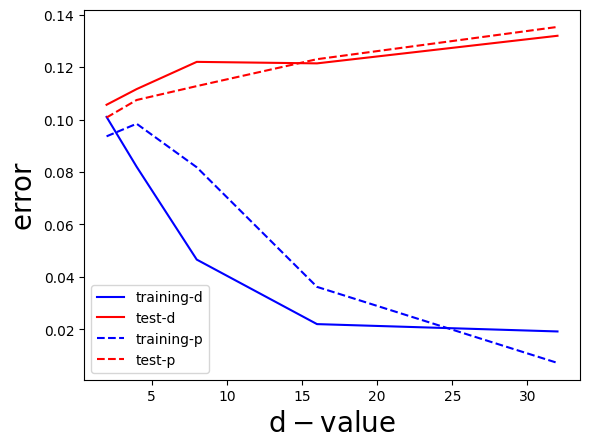

In [24]:
plt.plot(D_values,error_mean_training_d,label='training-d',color='blue')
plt.plot(D_values,error_mean_test_d,label='test-d',color='red')

plt.plot(D_values,error_mean_training_p,label='training-p',ls='--',color='blue')
plt.plot(D_values,error_mean_test_p,label='test-p',ls='--',color='red')

plt.xlabel('$\\rm d-value$',size=20)
plt.ylabel('$\\rm error$',size=20)

plt.legend()